In [23]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.lines import Line2D
from matplotlib import font_manager

In [4]:
# Load data from fifa.com and worldometers.info
df = pd.read_csv('WorldRankings - Sheet1.csv')

# Display the first few rows of the DataFrame
df.head()

,Team,FIFA Men's Ranking,FIFA Women's Ranking,Population,Population Ranking,FIBA Basketball Ranking,GDP Ranking,GDP
0,Argentina,1,33.0,45851378.0,35.0,8.0,22.0,6.460750e+11
1,Spain,2,2.0,47889958.0,32.0,5.0,15.0,1.620090e+12
2,France,3,11.0,66650804.0,23.0,4.0,7.0,3.051830e+12
3,England,4,4.0,NaN,NaN,NaN,NaN,NaN
4,Brazil,5,8.0,212812405.0,7.0,12.0,9.0,2.173670e+12


In [9]:
#Prepare dataframes by dropping null rows
fifa_women_df = df[["Team", "FIFA Men's Ranking", "FIFA Women's Ranking"]].dropna()
fiba_df = df[["Team", "FIFA Men's Ranking", "FIBA Basketball Ranking"]].dropna()
population_df = df[['Team', "FIFA Men's Ranking", 'Population Ranking']].dropna()
gdp_df = df[['Team', "FIFA Men's Ranking", 'GDP Ranking']].dropna()

# Convert rankings to integers
fifa_women_df["FIFA Men's Ranking"] = fifa_women_df["FIFA Men's Ranking"].astype(int)
fifa_women_df["FIFA Women's Ranking"] = fifa_women_df["FIFA Women's Ranking"].astype(int)
fiba_df["FIFA Men's Ranking"] = fiba_df["FIFA Men's Ranking"].astype(int)
fiba_df['FIBA Basketball Ranking'] = fiba_df['FIBA Basketball Ranking'].astype(int)
population_df["FIFA Men's Ranking"] = population_df["FIFA Men's Ranking"].astype(int)
population_df['Population Ranking'] = population_df['Population Ranking'].astype(int)
gdp_df["FIFA Men's Ranking"] = gdp_df["FIFA Men's Ranking"].astype(int)
gdp_df['GDP Ranking'] = gdp_df['GDP Ranking'].astype(int)

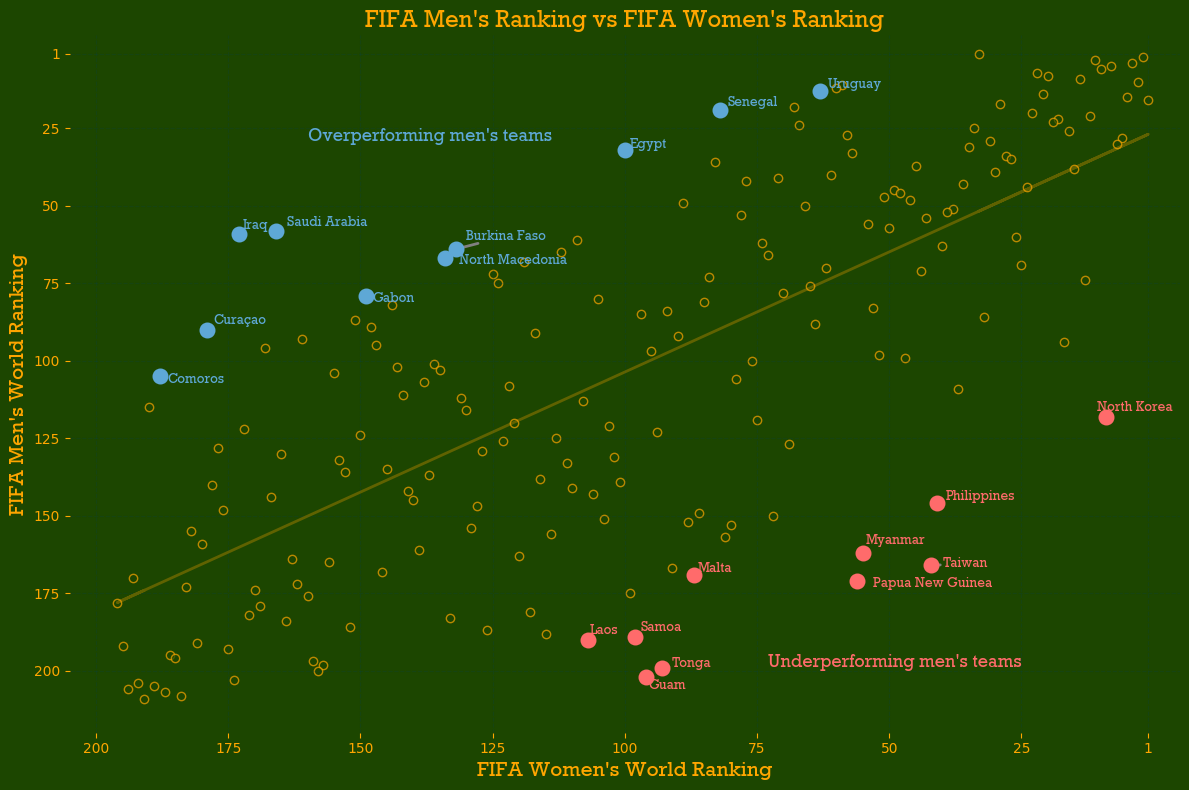

In [35]:
# Regression calculation (FIFA Women's on x, FIFA Men's on y)
x = fifa_women_df["FIFA Women's Ranking"]
y = fifa_women_df["FIFA Men's Ranking"]
m, b = np.polyfit(x, y, 1)
regression_y = m * x + b

# Signed distance from regression line
fifa_women_df['Signed Distance'] = y - (m * x + b)

# Extremes from regression line
top_10_above = fifa_women_df.nlargest(10, 'Signed Distance')   # Underperforming
top_10_below = fifa_women_df.nsmallest(10, 'Signed Distance')  # Overperforming

# Combine labels to show
highlighted_teams = pd.concat([
    top_10_above,
    top_10_below
]).drop_duplicates()

# Plot setup
plt.figure(figsize=(12, 8))
plt.gcf().set_facecolor('#1c4600')       # Figure background
plt.gca().set_facecolor('#1c4600')       # Axes background

# Plot all points
plt.scatter(fifa_women_df["FIFA Women's Ranking"], fifa_women_df["FIFA Men's Ranking"],
            color='#1c4600', edgecolors='#ffa600', alpha=0.7, label='All Countries')

# Regression line
plt.plot(x, regression_y, color='#ffa600', linewidth=2, linestyle='-', label='Regression line', alpha=0.3)

# Invert axes
plt.xlim(205, -5)
plt.ylim(220, -5)
plt.xticks([200,175, 150, 125, 100, 75, 50, 25, 1])
plt.yticks([200, 175, 150, 125, 100, 75, 50, 25, 1])

# Labels and title
plt.xlabel("FIFA Women's World Ranking", fontsize=14, fontweight='bold', family='Rockwell', color='#ffa600')
plt.ylabel("FIFA Men's World Ranking", fontsize=14, fontweight='bold', family='Rockwell', color='#ffa600')
plt.title("FIFA Men's Ranking vs FIFA Women's Ranking", fontsize=16, fontweight='bold', family='Rockwell', color='#ffa600')

# Axis tick colors
plt.tick_params(axis='both', colors='#ffa600')

# Grid
plt.grid(True, linestyle='--', alpha=0.2, color='#003f5c')

texts = []

# Teams above the regression line (underperforming)
for _, row in top_10_above.iterrows():
    plt.scatter(row["FIFA Women's Ranking"], row["FIFA Men's Ranking"], color='#ff6b6b', s=100, linewidths=1.5, zorder=5)
    texts.append(plt.text(row["FIFA Women's Ranking"], row["FIFA Men's Ranking"], row['Team'],
                          fontsize=9, family='Rockwell', color='#ff6b6b', zorder=6, fontweight='bold'))

# Teams below the regression line (overperforming)
for _, row in top_10_below.iterrows():
    plt.scatter(row["FIFA Women's Ranking"], row["FIFA Men's Ranking"], color='#5ea8d6', s=100, linewidths=1.5, zorder=5)
    texts.append(plt.text(row["FIFA Women's Ranking"], row["FIFA Men's Ranking"], row['Team'],
                          fontsize=9, family='Rockwell', color='#5ea8d6', zorder=6, fontweight='bold'))

# Adjust overlapping labels
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='-', color='gray', lw=2)
)

# Text annotations
plt.text(160, 25, "Overperforming men's teams", fontsize=12, ha='left', va='top', color='#5ea8d6', fontweight='bold', family='Rockwell')
plt.text(25, 200, "Underperforming men's teams", fontsize=12, ha='right', va='bottom', color='#ff6b6b', fontweight='bold', family='Rockwell')

# Remove plot spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Final layout
plt.tight_layout()
plt.show()


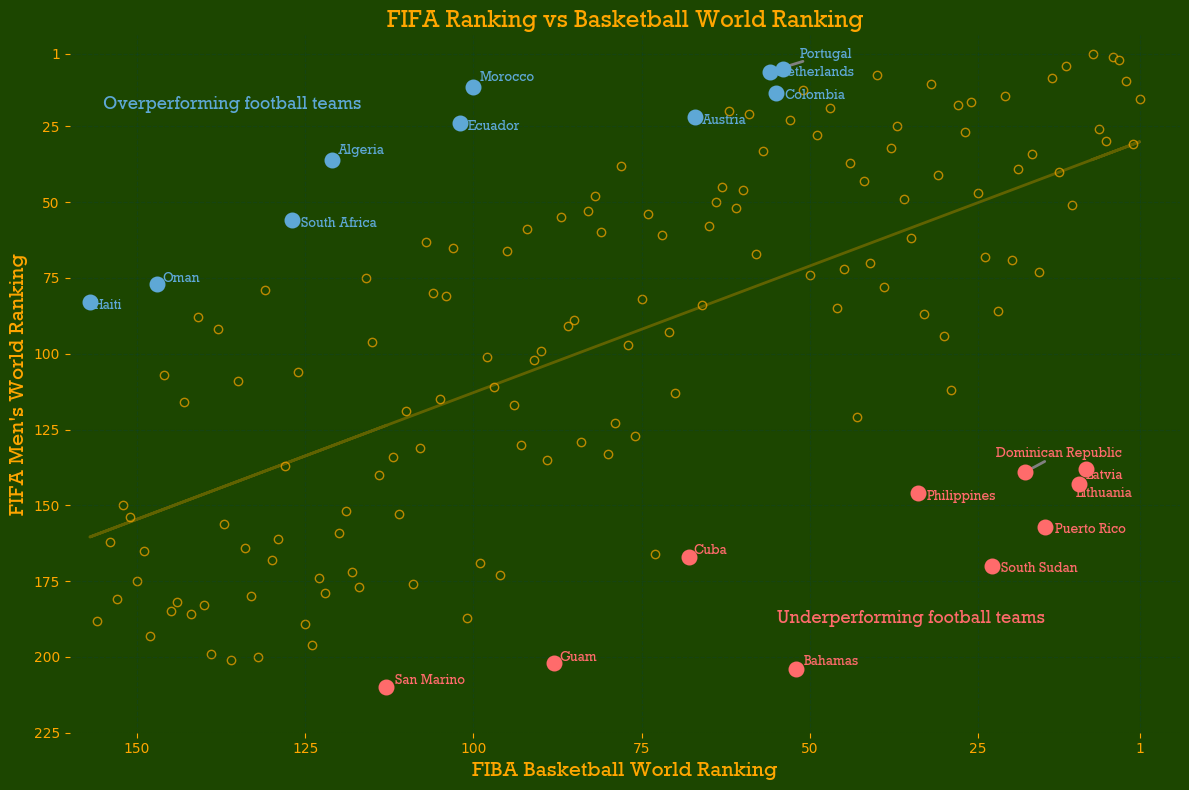

In [39]:
# Regression calculation (FIBA on x, Football on y)
x = fiba_df['FIBA Basketball Ranking']
y = fiba_df["FIFA Men's Ranking"]
m, b = np.polyfit(x, y, 1)
regression_y = m * x + b

# Signed distance from regression line
fiba_df['Signed Distance'] = y - (m * x + b)

# Extremes from regression line
top_10_above = fiba_df.nlargest(10, 'Signed Distance')   # Underperforming
top_10_below = fiba_df.nsmallest(10, 'Signed Distance')  # Overperforming

# Combine labels to show
highlighted_teams = pd.concat([
    top_10_above,
    top_10_below
]).drop_duplicates()

# Plot setup
plt.figure(figsize=(12, 8))
plt.gcf().set_facecolor('#1c4600')       # Figure background
plt.gca().set_facecolor('#1c4600')       # Axes background

# Plot all points
plt.scatter(fiba_df['FIBA Basketball Ranking'], fiba_df["FIFA Men's Ranking"],
            color='#1c4600', edgecolors='#ffa600', alpha=0.7, label='All Countries')

# Regression line
plt.plot(x, regression_y, color='#ffa600', linewidth=2, linestyle='-', label='Regression line', alpha=0.3)

# Invert axes
plt.xlim(160, -5)
plt.ylim(225, -5)
plt.xticks([150, 125, 100, 75, 50, 25, 1])
plt.yticks([225, 200, 175, 150, 125, 100, 75, 50, 25, 1])

# Labels using Rockwell
plt.xlabel('FIBA Basketball World Ranking', fontsize=14, fontweight='bold', family='Rockwell', color='#ffa600')
plt.ylabel("FIFA Men's World Ranking", fontsize=14, fontweight='bold', family='Rockwell', color='#ffa600')
plt.title('FIFA Ranking vs Basketball World Ranking', fontsize=16, fontweight='bold', family='Rockwell', color='#ffa600')

# Axis tick colors
plt.tick_params(axis='both', colors='#ffa600')

# Grid
plt.grid(True, linestyle='--', alpha=0.2, color='#003f5c')

texts = []

# Teams above the regression line (underperforming)
for _, row in top_10_above.iterrows():
    plt.scatter(row['FIBA Basketball Ranking'], row["FIFA Men's Ranking"], color='#ff6b6b', s=100, linewidths=1.5, zorder=5)
    texts.append(plt.text(row['FIBA Basketball Ranking'], row["FIFA Men's Ranking"], row['Team'],
                          fontsize=9, fontweight='bold', family='Rockwell', color='#ff6b6b', zorder=6))

# Teams below the regression line (overperforming)
for _, row in top_10_below.iterrows():
    plt.scatter(row['FIBA Basketball Ranking'], row["FIFA Men's Ranking"], color='#5ea8d6', s=100, linewidths=1.5, zorder=5)
    texts.append(plt.text(row['FIBA Basketball Ranking'], row["FIFA Men's Ranking"], row['Team'],
                          fontsize=9, fontweight='bold', family='Rockwell', color='#5ea8d6', zorder=6))

# Adjust text to avoid overlap
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='-', color='gray', lw=2)
)

# Text annotations using Rockwell
plt.text(155, 15, "Overperforming football teams", fontsize=12, ha='left', va='top', color='#5ea8d6', fontweight='bold', family='Rockwell')
plt.text(15, 190, "Underperforming football teams", fontsize=12, ha='right', va='bottom', color='#ff6b6b', fontweight='bold', family='Rockwell')

# Remove axis lines (spines)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Final layout
plt.tight_layout()
plt.show()


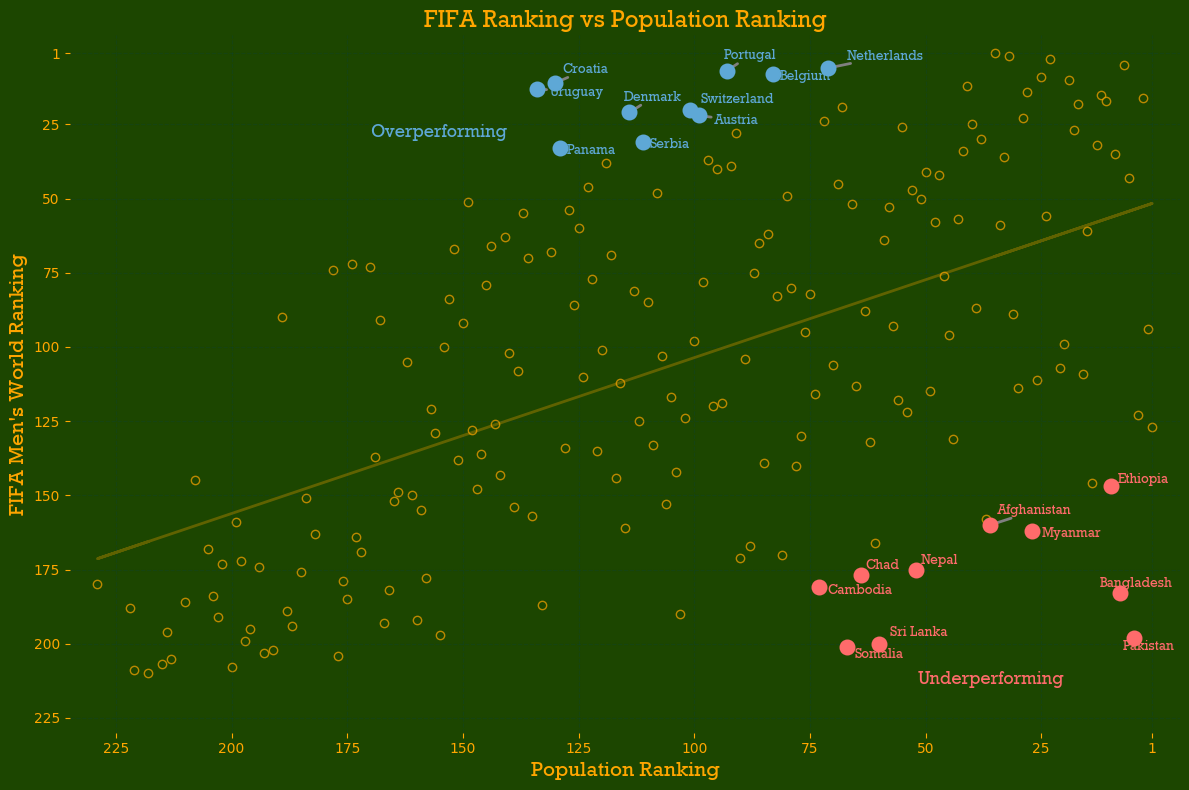

In [63]:
# Regression calculation (Population on x, Football on y)
x = population_df['Population Ranking']
y = population_df["FIFA Men's Ranking"]
m, b = np.polyfit(x, y, 1)
regression_y = m * x + b

# Signed distance from regression line
population_df['Signed Distance'] = y - (m * x + b)

# Extremes from regression line
top_10_above = population_df.nlargest(10, 'Signed Distance')   # Underperforming
top_10_below = population_df.nsmallest(10, 'Signed Distance')  # Overperforming

# Combine labels to show
highlighted_teams = pd.concat([
    top_10_above,
    top_10_below
]).drop_duplicates()

# Plot setup
plt.figure(figsize=(12, 8))
plt.gcf().set_facecolor('#1c4600')       # Figure background
plt.gca().set_facecolor('#1c4600')       # Axes background

# Plot all points
plt.scatter(population_df['Population Ranking'], population_df["FIFA Men's Ranking"],
            color='#1c4600', edgecolors='#ffa600', alpha=0.7, label='All Countries')

# Regression line
plt.plot(x, regression_y, color='#ffa600', linewidth=2, linestyle='-', label='Regression line', alpha=0.3)

# Invert axes
plt.xlim(235, -5)
plt.ylim(230, -5)
plt.xticks([225, 200, 175, 150, 125, 100, 75, 50, 25, 1])
plt.yticks([225, 200, 175, 150, 125, 100, 75, 50, 25, 1])

# Labels using Rockwell
plt.xlabel('Population Ranking', fontsize=14, fontweight='bold', family='Rockwell', color='#ffa600')
plt.ylabel("FIFA Men's World Ranking", fontsize=14, fontweight='bold', family='Rockwell', color='#ffa600')
plt.title('FIFA Ranking vs Population Ranking', fontsize=16, fontweight='bold', family='Rockwell', color='#ffa600')

# Axis tick colors
plt.tick_params(axis='both', colors='#ffa600')

# Grid
plt.grid(True, linestyle='--', alpha=0.2, color='#003f5c')

texts = []

# Teams above the regression line (underperforming)
for _, row in top_10_above.iterrows():
    plt.scatter(row['Population Ranking'], row["FIFA Men's Ranking"], color='#ff6b6b', s=100, linewidths=1.5, zorder=5)
    texts.append(plt.text(row['Population Ranking'], row["FIFA Men's Ranking"], row['Team'],
                          fontsize=9, fontweight='bold', family='Rockwell', color='#ff6b6b', zorder=6))

# Teams below the regression line (overperforming)
for _, row in top_10_below.iterrows():
    plt.scatter(row['Population Ranking'], row["FIFA Men's Ranking"], color='#5ea8d6', s=100, linewidths=1.5, zorder=5)
    texts.append(plt.text(row['Population Ranking'], row["FIFA Men's Ranking"], row['Team'],
                          fontsize=9, fontweight='bold', family='Rockwell', color='#5ea8d6', zorder=6))

# Adjust text to avoid overlap
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='-', color='gray', lw=2)
)

# Text annotations using Rockwell
plt.text(170, 25, "Overperforming", fontsize=12, ha='left', va='top', color='#5ea8d6', fontweight='bold', family='Rockwell')
plt.text(20, 215, "Underperforming", fontsize=12, ha='right', va='bottom', color='#ff6b6b', fontweight='bold', family='Rockwell')

# Remove axis lines (spines)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Final layout
plt.tight_layout()
plt.show()


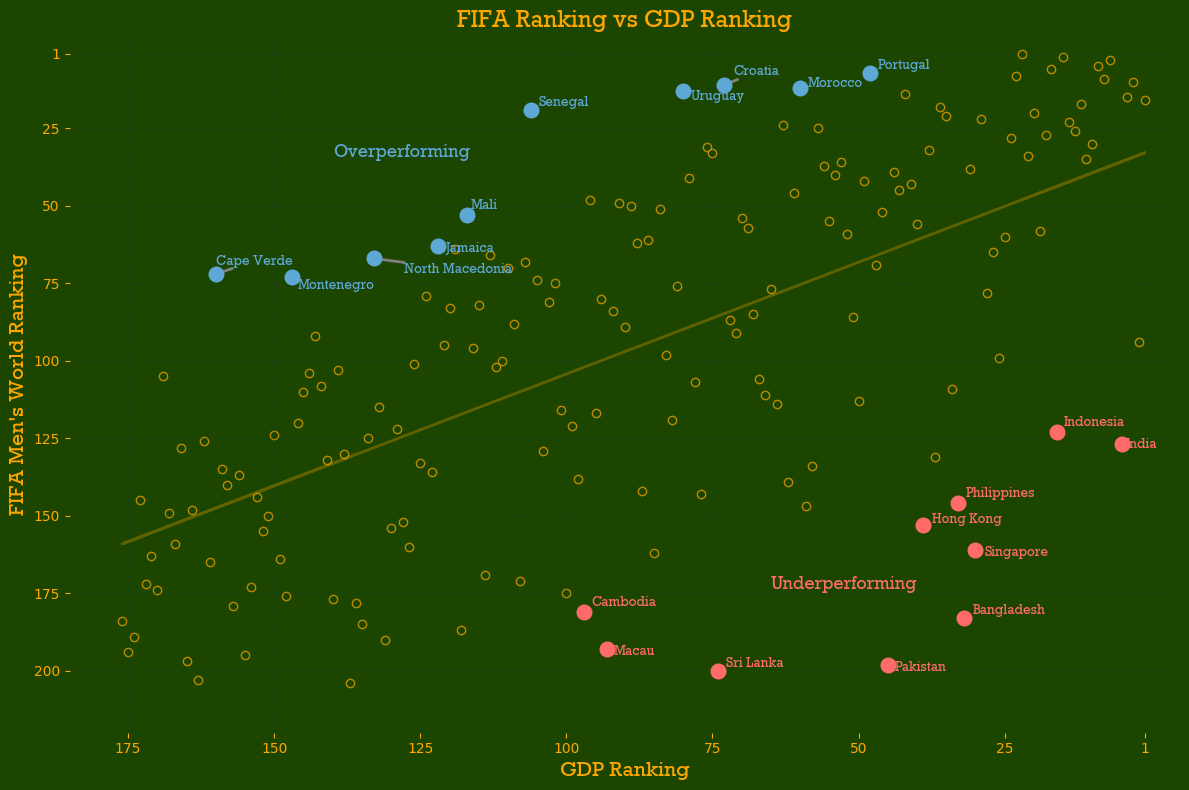

In [55]:
# Regression calculation (GDP on x, Football on y)
x = gdp_df['GDP Ranking']
y = gdp_df["FIFA Men's Ranking"]
m, b = np.polyfit(x, y, 1)
regression_y = m * x + b

# Signed distance from regression line
gdp_df['Signed Distance'] = y - (m * x + b)

# Extremes from regression line
top_10_above = gdp_df.nlargest(10, 'Signed Distance')   # Underperforming
top_10_below = gdp_df.nsmallest(10, 'Signed Distance')  # Overperforming

# Combine labels to show
highlighted_teams = pd.concat([
    top_10_above,
    top_10_below
]).drop_duplicates()

# Plot setup
plt.figure(figsize=(12, 8))
plt.gcf().set_facecolor('#1c4600')        # Figure background
plt.gca().set_facecolor('#1c4600')        # Axes background

# Plot all points
plt.scatter(gdp_df['GDP Ranking'], gdp_df["FIFA Men's Ranking"],
            color='#1c4600', edgecolors='#ffa600', alpha=0.7, label='All Countries')

# Regression line
plt.plot(x, regression_y, color='#ffa600', linewidth=2, label='Regression line', alpha=0.3)

# Invert axes
plt.xlim(185, -5)
plt.ylim(220, -5)
plt.xticks([175, 150, 125, 100, 75, 50, 25, 1])
plt.yticks([200, 175, 150, 125, 100, 75, 50, 25, 1])

# Labels using Rockwell
plt.xlabel('GDP Ranking', fontsize=14, fontweight='bold', family='Rockwell', color='#ffa600')
plt.ylabel("FIFA Men's World Ranking", fontsize=14, fontweight='bold', family='Rockwell', color='#ffa600')
plt.title('FIFA Ranking vs GDP Ranking', fontsize=16, fontweight='bold', family='Rockwell', color='#ffa600')

# Axis tick colors
plt.tick_params(axis='both', colors='#ffa600')

# Grid
plt.grid(True, linestyle='--', alpha=0.2, color='#003f5c')

texts = []

# Teams above the regression line (underperforming)
for _, row in top_10_above.iterrows():
    plt.scatter(row['GDP Ranking'], row["FIFA Men's Ranking"], color='#ff6b6b', s=100, linewidths=1.5, zorder=5)
    texts.append(plt.text(row['GDP Ranking'], row["FIFA Men's Ranking"], row['Team'],
                          fontsize=9, fontweight='bold', family='Rockwell', color='#ff6b6b', zorder=6))

# Teams below the regression line (overperforming)
for _, row in top_10_below.iterrows():
    plt.scatter(row['GDP Ranking'], row["FIFA Men's Ranking"], color='#5ea8d6', s=100, linewidths=1.5, zorder=5)
    texts.append(plt.text(row['GDP Ranking'], row["FIFA Men's Ranking"], row['Team'],
                          fontsize=9, fontweight='bold', family='Rockwell', color='#5ea8d6', zorder=6))

# Adjust text to avoid overlap
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='-', color='gray', lw=2)
)

# Text annotations using Rockwell
plt.text(140, 30, "Overperforming", fontsize=12, ha='left', va='top', color='#5ea8d6', fontweight='bold', family='Rockwell')
plt.text(40, 175, "Underperforming", fontsize=12, ha='right', va='bottom', color='#ff6b6b', fontweight='bold', family='Rockwell')

# Remove axis lines (spines)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Final layout
plt.tight_layout()
plt.show()
